In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
column_names = ['Status_Checking_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                'Savings_Account_Bonds', 'Employment_Since', 'Installment_Rate', 'Personal_Status_Sex',
                'Other_Debtors_Guarantors', 'Present_Residence_Since', 'Property', 'Age', 'Other_Installment_Plans',
                'Housing', 'Number_of_Credits', 'Job', 'Number_of_People_Liable', 'Telephone', 'Foreign_Worker', 'Target']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

<ipython-input-44-b7a7802bb0ba>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


In [45]:
data.head()

,Status_Checking_Account,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors_Guarantors,...,Property,Age,Other_Installment_Plans,Housing,Number_of_Credits,Job,Number_of_People_Liable,Telephone,Foreign_Worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Status_Checking_Account   1000 non-null   object
 1   Duration                  1000 non-null   int64 
 2   Credit_History            1000 non-null   object
 3   Purpose                   1000 non-null   object
 4   Credit_Amount             1000 non-null   int64 
 5   Savings_Account_Bonds     1000 non-null   object
 6   Employment_Since          1000 non-null   object
 7   Installment_Rate          1000 non-null   int64 
 8   Personal_Status_Sex       1000 non-null   object
 9   Other_Debtors_Guarantors  1000 non-null   object
 10  Present_Residence_Since   1000 non-null   int64 
 11  Property                  1000 non-null   object
 12  Age                       1000 non-null   int64 
 13  Other_Installment_Plans   1000 non-null   object
 14  Housing                  

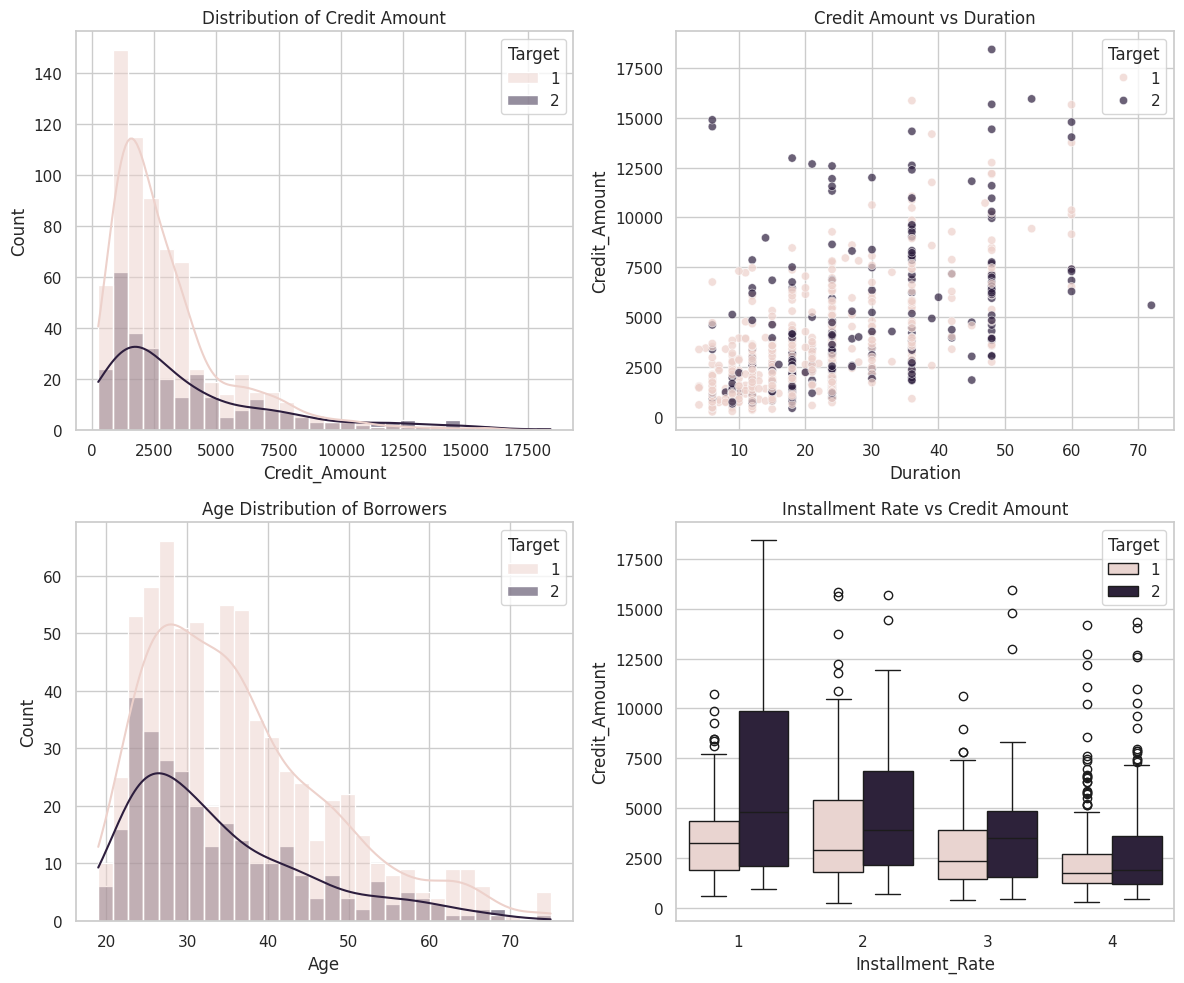

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Credit Amount Distribution
sns.histplot(data, x="Credit_Amount", hue="Target", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Credit Amount")

# Duration vs Credit Amount
sns.scatterplot(data=data, x="Duration", y="Credit_Amount", hue="Target", alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title("Credit Amount vs Duration")

# Age Distribution
sns.histplot(data, x="Age", hue="Target", bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Age Distribution of Borrowers")

# Installment Rate vs Credit Amount
sns.boxplot(data=data, x="Installment_Rate", y="Credit_Amount", hue="Target", ax=axes[1, 1])
axes[1, 1].set_title("Installment Rate vs Credit Amount")

plt.tight_layout()
plt.show()


In [48]:
data.describe()

,Duration,Credit_Amount,Installment_Rate,Present_Residence_Since,Age,Number_of_Credits,Number_of_People_Liable,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [51]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature scaling
scaler = StandardScaler()
data[['Duration', 'Credit_Amount', 'Installment_Rate', 'Age', 'Number_of_Credits', 'Number_of_People_Liable']] = scaler.fit_transform(
    data[['Duration', 'Credit_Amount', 'Installment_Rate', 'Age', 'Number_of_Credits', 'Number_of_People_Liable']])

# Split data into features and target
X = data.drop('Target', axis=1)
y = data['Target'] - 1  # Adjust target to 0 and 1

In [53]:
X.head()

,Status_Checking_Account,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors_Guarantors,Present_Residence_Since,Property,Age,Other_Installment_Plans,Housing,Number_of_Credits,Job,Number_of_People_Liable,Telephone,Foreign_Worker
0,0,-1.236478,4,4,-0.745131,4,4,0.918477,2,0,4,0,2.766456,2,1,1.027079,2,-0.428290,1,0
1,1,2.248194,2,4,0.949817,0,2,-0.870183,1,0,2,0,-1.191404,2,1,-0.704926,2,-0.428290,0,0
2,3,-0.738668,4,7,-0.416562,0,3,-0.870183,2,0,3,0,1.183312,2,1,-0.704926,1,2.334869,0,0
3,0,1.750384,2,3,1.634247,0,3,-0.870183,2,2,4,1,0.831502,2,2,-0.704926,2,2.334869,0,0
4,0,0.256953,3,0,0.566664,0,2,0.024147,2,0,4,3,1.535122,2,2,1.027079,2,2.334869,0,0


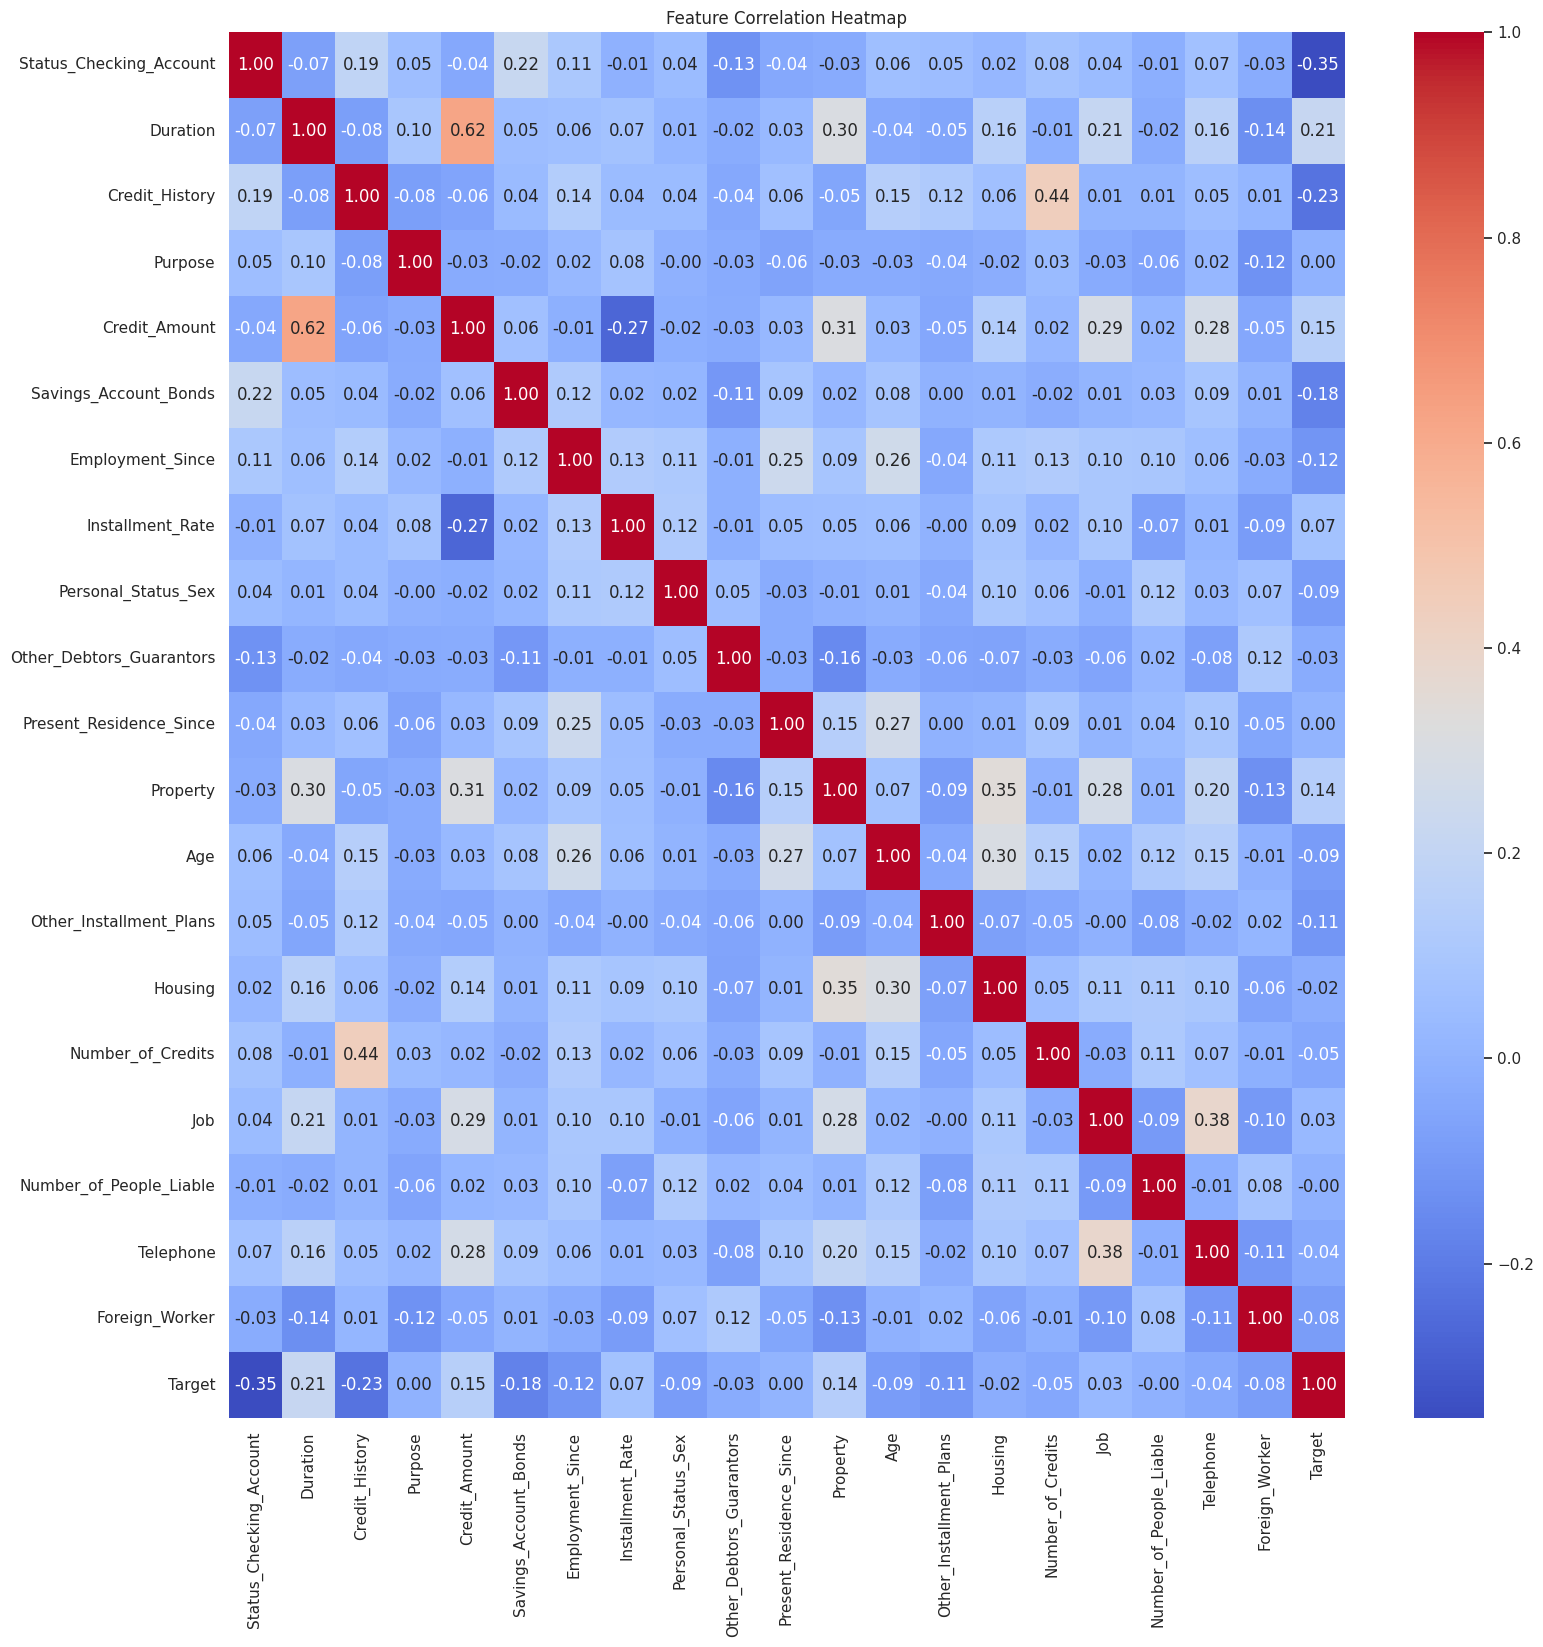

In [54]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LogisticRegression(max_iter=1000)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = GradientBoostingClassifier(n_estimators=100, random_state=42)

clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('rf', model2),
    ('gb', model3)
], voting='hard')

In [59]:
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))])

# **Prediction and Evaluation**

In [60]:
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[129  12]
 [ 27  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       141
           1       0.73      0.54      0.62        59

    accuracy                           0.81       200
   macro avg       0.78      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200

